# Importing libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [67]:
df=pd.read_csv("/content/delivery_time.csv")

In [68]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visulaization

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [70]:
df.shape

(21, 2)

In [71]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

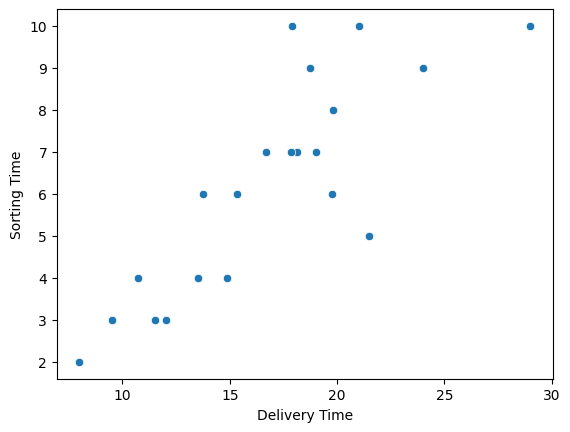

In [72]:
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=df)

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

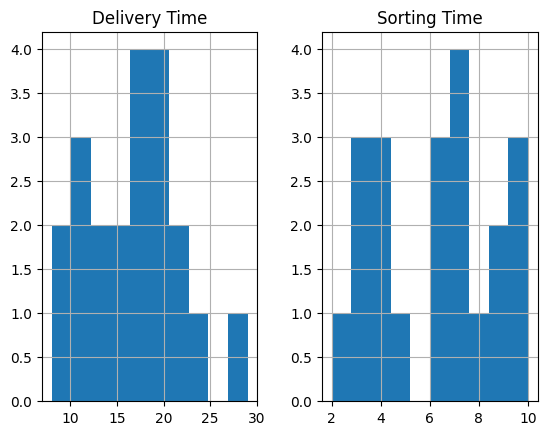

In [73]:
df.hist()

In [74]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

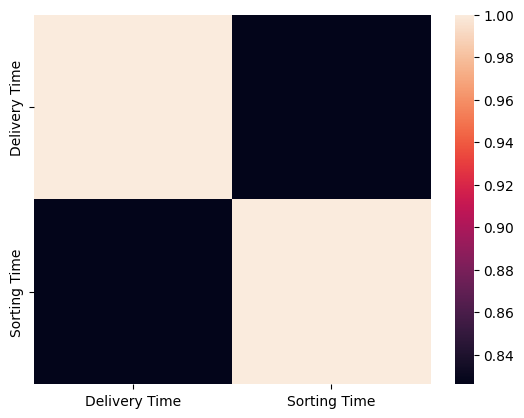

In [75]:
sns.heatmap(df.corr())

In [76]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

# Model Building

In [77]:

model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        10:32:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

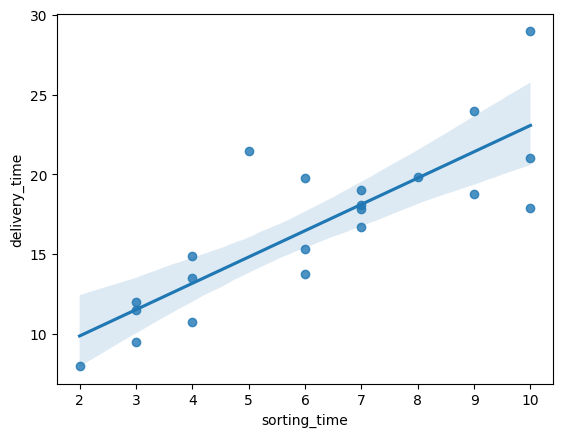

In [79]:
sns.regplot(y='delivery_time',x='sorting_time',data=df)

In [80]:
ypred=model.predict(df['sorting_time'])

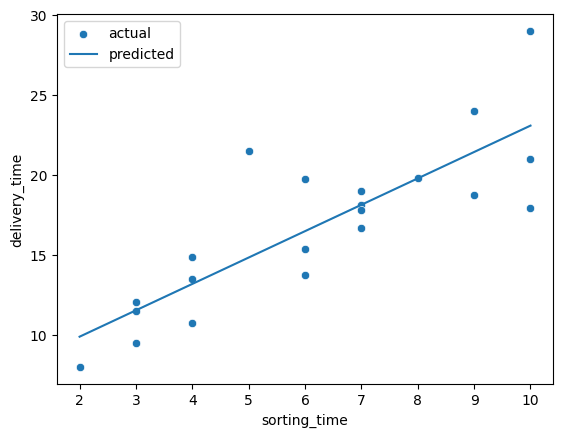

In [81]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actual')
sns.lineplot(x='sorting_time',y=ypred,data=df,label='predicted')
plt.legend()

In [82]:
model.resid #errors

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [83]:
rmse=np.sqrt(np.mean((np.array(df["delivery_time"])-np.array(ypred))**2))
rmse

2.7916503270617654

# Transformations

In [84]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=df).fit()

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        10:32:50   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
ypred1=model1.predict(df["sorting_time"])

In [87]:
rmse1=np.sqrt(np.mean((np.array(df["delivery_time"])-np.array(ypred1))**2))
rmse1

2.733171476682066

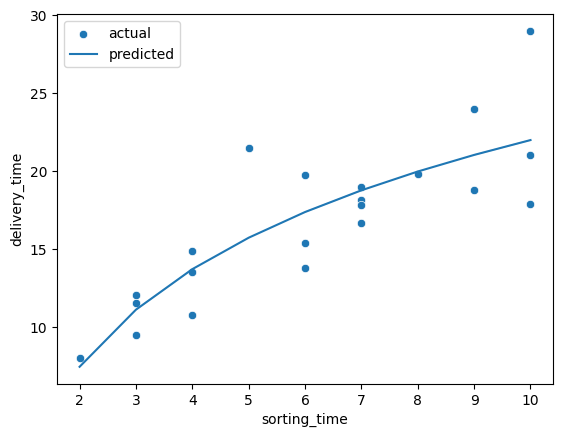

In [88]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actual')
sns.lineplot(x='sorting_time',y=ypred1,data=df,label='predicted')
plt.legend()

In [89]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=df).fit()

In [90]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 07 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                           10:32:51   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
ypred2=model2.predict(df["sorting_time"])

In [92]:
ypred2=np.exp(ypred2)

In [93]:
rmse2=np.sqrt((np.mean(np.array(df["delivery_time"])-np.array(ypred2))**2))
rmse2

0.1981093847379055

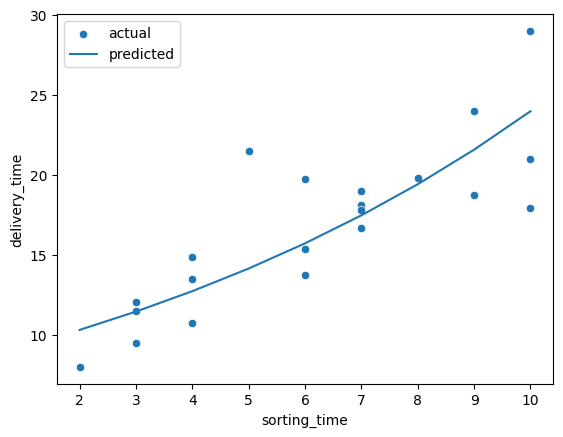

In [94]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actual')
sns.lineplot(x='sorting_time',y=ypred2,data=df,label='predicted')
plt.legend()

In [95]:
df["sorting_time_sq"]=df["sorting_time"]*df["sorting_time"]

In [96]:
df.head()

,delivery_time,sorting_time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [97]:
model3=smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sq",data=df).fit()

In [98]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 07 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                           10:32:51   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
ypred3=model3.predict(df[["sorting_time","sorting_time_sq"]])

In [100]:
ypred3=np.exp(ypred3)

In [101]:
rmse3=np.sqrt(np.mean((np.array(df['delivery_time'])-np.array(ypred3))**2))

In [102]:
rmse3

2.799041988740932

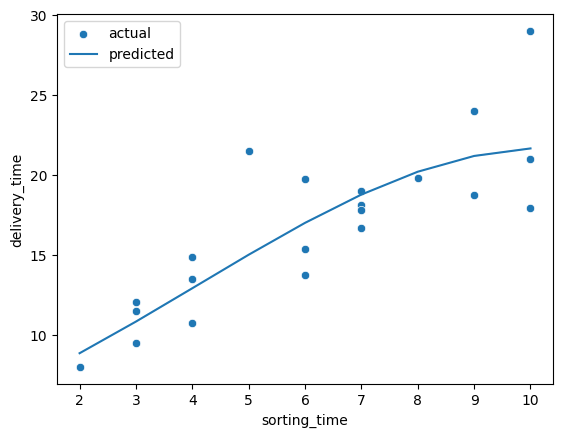

In [103]:
sns.scatterplot(x='sorting_time',y='delivery_time',data=df,label='actual')
sns.lineplot(x='sorting_time',y=ypred3,data=df,label='predicted')
plt.legend()

In [104]:
print(rmse)
print(rmse1)
print(rmse2)
print(rmse3)

2.7916503270617654
2.733171476682066
0.1981093847379055
2.799041988740932


# As we can observe if we want more accuracy we can consider model3 but in this the rmse value is more than all other models.If we want less rmse value we can consider model2.

<Axes: ylabel='Count'>

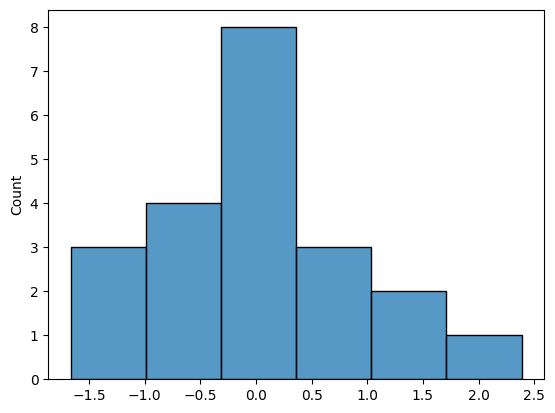

In [105]:
sns.histplot(model2.resid_pearson)